In [3]:
PHONEME_KEY = "phoneme"
VISEME_KEY = "viseme"
LETTER_KEY = "letter"

In [97]:
train_with = PHONEME_KEY 

# Dependencies

In [5]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import re
import ast
import sys
import cv2
import random
import json

!pip install num2words
!pip install jiwer

from jiwer import wer

## CSF
proj_data_dir = "../../proj_data/"
proj_model_dir = "../../proj_models/"



## Personal
# proj_data_dir = "D:/USB/data_gen_6/"


proj_code_dir = "../classes"
sys.path.append(proj_code_dir)
from PhonemesVisemes import word_to_phonemes, phonemes_to_visemes 

  Using cached https://files.pythonhosted.org/packages/0d/4f/ee537ab20144811dd99321735ff92ef2b3a3230b77ed7454bed4c44d21fc/jiwer-3.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/27/36/22741bb354505ca284c2149a4c7fdee396a6cdeae3f4c0614acf6b0ee27e/rapidfuzz-3.4.0.tar.gz
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/apps/apps/binapps/anaconda3/2019.07-numpy-fix/lib/python3.7/site-packages/pip/_internal/cli/base_command.py", line 178, in main
    status = self.run(options, args)
  File "/opt/apps/apps/binapps/anaconda3/2019.07-numpy-fix/lib/python3.7/site-packages/pip/_internal/commands/install.py", line 352, in run
    resolver.resolve(requirement_set)
  File "/opt/apps/apps/binapps/anaconda3/2019.07-numpy-fix/lib/python3.7/site-packages/pip/_internal/resolve.py", line 131, in resolve
    self._resolve_one(requirement_set, req)
  File "/opt/apps/apps/binapps/anaconda3/2019.07-numpy-fix/lib/python3.7/site-packages/pip/_internal/resolve.py", li

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, LSTM, TimeDistributed,Bidirectional, InputLayer,Attention,Dense,Dropout,Input,Embedding,MultiHeadAttention,LayerNormalization, Concatenate, Conv1D, MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report

!pip install datasets
from datasets import Dataset

2024-02-13 10:40:18.634478: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 10:40:22.999982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 10:40:23.002601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 10:40:46.604282: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


  Using cached https://files.pythonhosted.org/packages/d3/95/ef83542e7a8e2bfc4432ee2cd8a6b52eb30fb1e605871e8871e94ce65fb1/datasets-2.13.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/be/e3/a84bf2e561beed15813080d693b4b27573262433fced9c1d1fea59e60553/dill-0.3.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4.66.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bd/64/f0d369ede0ca54fdd520bdee5086dbaf0af81dac53a2ce847bd1ec6e0bf1/fsspec-2023.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ca/3f/8354ce12fd13bd5c5bb4722261a10ca1d6e2eb7c1c08fa3d8a4e9dc98f44/multiprocess-0.70.15-py37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/68/d3410

Failed to build pyarrow
ERROR: Could not build wheels for pyarrow which use PEP 517 and cannot be installed directly


/mnt/iusers01/fse-ugpgt01/compsci01/h61781jp/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare Data

In [7]:
data_mat = loadmat(os.path.join(proj_data_dir, "batches_both/all_split.mat"))


In [98]:
train_X_frames = data_mat["train_data_frames"]
train_X_landmarks = data_mat["train_data_keypoints"]
train_Y = data_mat["train_labels"]


test_X_frames = data_mat["test_data_frames"]
test_X_landmarks = data_mat["test_data_keypoints"]
test_Y = data_mat["test_labels"]

val_X_frames = data_mat["val_data_frames"]
val_X_landmarks = data_mat["val_data_keypoints"]
val_Y = data_mat["val_labels"]

In [9]:
def show_data():
    print(f"Train data frames length: {np.shape(train_X_frames)}")
    print(f"Train data landmarks length: {np.shape(train_X_landmarks)}")
    print(f"Train labels length: {np.shape(train_Y)}")

    print(f"Test data frames length: {np.shape(test_X_frames)}")
    print(f"Test data landmarks length: {np.shape(test_X_landmarks)}")
    print(f"Test labels length: {np.shape(test_Y)}")

    print(f"Validation data frames length: {np.shape(val_X_frames)}")
    print(f"Validation data landmarks length: {np.shape(val_X_landmarks)}")
    print(f"Validation labels length: {np.shape(val_Y)}")

In [78]:
show_data()

Train data frames length: (7028, 21, 2048)
Train data landmarks length: (7028, 21, 40, 3)
Train labels length: (3514,)
Test data frames length: (878, 21, 2048)
Test data landmarks length: (878, 21, 40, 3)
Test labels length: (439,)
Validation data frames length: (878, 21, 2048)
Validation data landmarks length: (878, 21, 40, 3)
Validation labels length: (439,)


## Prune Data
Remove some frames of the data: some frames include other words

In [11]:
prune_begin = 4
prune_end = 4

In [12]:
def prune_data(data, before: int, after: int):
    new_data = []
    for batch in data:
        batch_length = len(batch)
        new_data.append(batch[before:(batch_length-after)])
    print(np.shape(new_data))
    return new_data

In [13]:
train_X_frames = prune_data(data=train_X_frames, before=prune_begin, after=prune_end)
test_X_frames = prune_data(data=test_X_frames, before=prune_begin, after=prune_end)
val_X_frames = prune_data(data=val_X_frames, before=prune_begin, after=prune_end)

train_X_landmarks = prune_data(data=train_X_landmarks, before=prune_begin, after=prune_end)
test_X_landmarks = prune_data(data=test_X_landmarks, before=prune_begin, after=prune_end)
val_X_landmarks = prune_data(data=val_X_landmarks, before=prune_begin, after=prune_end)

(3514, 21, 100, 100)
(439, 21, 100, 100)
(439, 21, 100, 100)
(3514, 21, 40, 3)
(439, 21, 40, 3)
(439, 21, 40, 3)


In [14]:
show_data()

Train data frames length: (3514, 21, 100, 100)
Train data landmarks length: (3514, 21, 40, 3)
Train labels length: (3514,)
Test data frames length: (439, 21, 100, 100)
Test data landmarks length: (439, 21, 40, 3)
Test labels length: (439,)
Validation data frames length: (439, 21, 100, 100)
Validation data landmarks length: (439, 21, 40, 3)
Validation labels length: (439,)


## Augment Data

In [15]:
import math

def rotate(x: float,y: float,z: float,theta: float,xo: float = 0.0,yo: float = 0.0):
    """
    Rotates an (x.y) about the origin specified by some theta
    """
    x_temp = x - xo
    y_temp = y - yo
    xr=math.cos(theta)*(x_temp)-math.sin(theta)*(y_temp)
    yr=math.sin(theta)*(x_temp)+math.cos(theta)*(y_temp)
    xr = xr + xo
    yr = yr + yo
    return [xr,yr,z]

def rotate_landmarks(landmarks, theta: float):
    new_landmarks = []
    for ldmk in landmarks:
        new_ldmk = rotate(x=ldmk[0],y=ldmk[1],z=ldmk[2],theta=theta, xo=0.5, yo=0.5)
        new_landmarks.append(new_ldmk)
    return new_landmarks

In [16]:
def augment_data_ldmk(data, labels, rotate = False):
  new_data = []
  new_labels = []
  for frames, label in zip(data, labels):
    aug_vector = [[1,0,0] for _ in range(40)]
    frames_flip = [np.abs(frame - aug_vector) for frame in frames]
    ##Gets a random rotation. Makes sure this isn't too small of a rotation
    if(rotate):
      random_theta = 0.0
      while(-0.1 <= random_theta <= 0.1):
        random_theta = random.uniform(-math.pi/4, math.pi/4)
      frames_rotated = [rotate_landmarks(landmarks=frame, theta=random_theta) for frame in frames]
      frames_flip_rotated = [rotate_landmarks(landmarks=frame, theta=random_theta) for frame in frames_flip]

    new_data.append(np.array(frames))
    new_data.append(np.array(frames_flip))
    if(rotate):
      new_data.append(np.array(frames_rotated))
      new_data.append(np.array(frames_flip_rotated))

    if(rotate):
      new_labels += ([label] * 4)
    else:
      new_labels += ([label] * 2)
  return (new_data, new_labels)

def augment_data_frames(data, labels):
  new_data = []
  new_labels = []
  for frames, label in zip(data, labels):
    new_frames = [cv2.cvtColor(frame,cv2.COLOR_GRAY2RGB) for frame in frames]
    frames_flip = [cv2.flip(frame, 1) for frame in new_frames]

    new_data.append(np.array(new_frames))
    new_data.append(np.array(frames_flip))

    new_labels += ([label] * 2)
  return (new_data, new_labels)

In [99]:
train_X_frames, _ = augment_data_frames(data=train_X_frames, labels=train_Y)
test_X_frames, _ = augment_data_frames(data=test_X_frames, labels=test_Y)
val_X_frames, _ = augment_data_frames(data=val_X_frames, labels=val_Y)

train_X_landmarks, train_Y = augment_data_ldmk(data=train_X_landmarks, labels=train_Y)
test_X_landmarks, test_Y = augment_data_ldmk(data=test_X_landmarks, labels=test_Y)
val_X_landmarks, val_Y = augment_data_ldmk(data=val_X_landmarks, labels=val_Y)

In [89]:
show_data()

Train data frames length: (7028, 21, 2048)
Train data landmarks length: (7028, 21, 40, 3)
Train labels length: (7028,)
Test data frames length: (878, 21, 2048)
Test data landmarks length: (878, 21, 40, 3)
Test labels length: (878,)
Validation data frames length: (878, 21, 2048)
Validation data landmarks length: (878, 21, 40, 3)
Validation labels length: (878,)


## Convert Frames to FVs

In [19]:
def build_feature_extractor(img_shape: int = 100):
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(img_shape, img_shape,3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((img_shape, img_shape,3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

2024-02-13 10:42:46.068835: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [20]:
frame_num = np.shape(train_X_frames)[1]

def encode_dataset(data):
    data_X = [feature_extractor.predict(x=np.array(batch), batch_size=frame_num) for batch in data]
    print(np.shape(data_X))
    return data_X

In [21]:
train_X_frames = encode_dataset(data=train_X_frames)
test_X_frames = encode_dataset(data=test_X_frames)
val_X_frames = encode_dataset(data=val_X_frames)

1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 63ms/step
(7028, 21, 2048)
1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 60ms/step
(878, 21, 2048)
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 65ms/step
(878, 21, 2048)


In [22]:
show_data()

Train data frames length: (7028, 21, 2048)
Train data landmarks length: (7028, 21, 40, 3)
Train labels length: (7028,)
Test data frames length: (878, 21, 2048)
Test data landmarks length: (878, 21, 40, 3)
Test labels length: (878,)
Validation data frames length: (878, 21, 2048)
Validation data landmarks length: (878, 21, 40, 3)
Validation labels length: (878,)


## Data Example

In [23]:
def landmarks_to_img(landmarks):
  width = 200
  height = 200
  new_frame = np.zeros((width,height))
  for ldmk in landmarks:
      new_frame = cv2.circle(
          img=new_frame,
          center=(int(ldmk[0] * width), int(ldmk[1] * height)),
          radius=2,
          thickness=1,
          color=(255,255,255),
      )
  return new_frame

def show_frames(frames, landmark: bool):
  print(np.shape(frames))
  fig, ax = plt.subplots(figsize=(18, 2))
  if(not landmark):
    row = frames[0]
    for x in range(1,len(frames)):
      row = np.concatenate((row, frames[x]), axis = 1)
    ax.imshow(row, cmap='gray', vmin=0, vmax=255)
  else:
    row = landmarks_to_img(frames[0])
    for x in range(1,len(frames)):
      row = np.concatenate((row, landmarks_to_img(frames[x])), axis = 1)
    ax.imshow(row, cmap='gray', vmin=0, vmax=255)


(21, 40, 3)
Class: CHANCE 


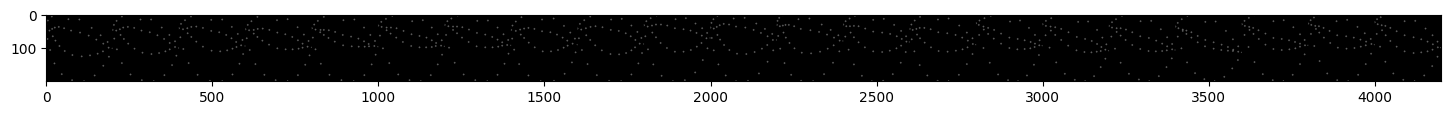

In [24]:
show_frames(frames=train_X_landmarks[0],landmark=True)
print(f"Class: {train_Y[0]}")

## Encode Labels

In [25]:
number_of_frames = np.shape(test_X_frames)[1]

In [26]:
word_set = np.unique(train_Y)
word_set.sort()
word_set = [x.strip() for x in word_set]
word_set = [word.ljust(number_of_frames, ' ') for word in word_set]

label_breakdown = [[x for x in word] for word in word_set]

letters = np.array([])
for label in label_breakdown:
    letters = np.concatenate((letters,label))
letters = np.unique(letters)

#One hot
# letter_encoder = keras.layers.StringLookup(
#     num_oov_indices=0, vocabulary=letters,output_mode="one_hot"
# )

#Numerical
letter_encodings = {letters[i]: i for i in range(len(letters))}
N = len(letters)
letter_encodings[" "] = N #Encode padding as the last index in the array due to how CTC handles blank space

num_encodings = {letter_encodings[key]:key for key in list(letter_encodings.keys())}
num_encodings[-1] = " "
num_encodings[0] = " "

word_encodings = {word_set[i].strip().lower(): [letter_encodings[letter] for letter in word_set[i]] for i in range(len(word_set))}

print(f"Letters to numbers: {letter_encodings}")
print(f"Numbers to letters: {num_encodings}")
print(f"Word to numbers: {word_encodings}")

num_letters = N

Letters to numbers: {' ': 16, 'A': 1, 'B': 2, 'C': 3, 'E': 4, 'F': 5, 'H': 6, 'I': 7, 'L': 8, 'M': 9, 'N': 10, 'O': 11, 'T': 12, 'U': 13, 'V': 14, 'Y': 15}
Numbers to letters: {16: ' ', 1: 'A', 2: 'B', 3: 'C', 4: 'E', 5: 'F', 6: 'H', 7: 'I', 8: 'L', 9: 'M', 10: 'N', 11: 'O', 12: 'T', 13: 'U', 14: 'V', 15: 'Y', -1: ' ', 0: ' '}
Word to numbers: {'about': [1, 2, 11, 13, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'believe': [2, 4, 8, 7, 4, 14, 4, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'chance': [3, 6, 1, 10, 3, 4, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'family': [5, 1, 9, 7, 8, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]}


In [27]:
num_frames = 21

In [28]:
phoneme_subset = []
for word in word_set:
    phoneme_subset.extend(word_to_phonemes(word.lower().replace(" ","")))
phoneme_subset = np.unique(phoneme_subset)

phoneme_encodings = {phoneme_subset[i]: (i + 1) for i in range(len(phoneme_subset))}

N = len(phoneme_subset) + 1
phoneme_encodings[" "] = N

reverse_phoneme_encodings = {phoneme_encodings[key]:key for key in list(phoneme_encodings.keys())}
reverse_phoneme_encodings[-1] = " "
reverse_phoneme_encodings[0] = " "

word_phoneme_encodings = {}
for word in word_set:
    lower_word = word.lower().strip().replace(" ","")
    word_phoneme_encodings[lower_word] = [phoneme_encodings[phoneme] for phoneme in word_to_phonemes(lower_word)]
    while(len(word_phoneme_encodings[lower_word]) < num_frames):
        word_phoneme_encodings[lower_word].append(phoneme_encodings[" "])

print(f"Phonemes to numbers: {phoneme_encodings}")
print(f"Numbers to phonemes: {reverse_phoneme_encodings}")
print(f"Word to numbers: {word_phoneme_encodings}")

num_phonemes = N

Phonemes to numbers: {'AE1': 1, 'AH0': 2, 'AW1': 3, 'B': 4, 'CH': 5, 'F': 6, 'IH0': 7, 'IY0': 8, 'IY1': 9, 'L': 10, 'M': 11, 'N': 12, 'S': 13, 'T': 14, 'V': 15, ' ': 16}
Numbers to phonemes: {1: 'AE1', 2: 'AH0', 3: 'AW1', 4: 'B', 5: 'CH', 6: 'F', 7: 'IH0', 8: 'IY0', 9: 'IY1', 10: 'L', 11: 'M', 12: 'N', 13: 'S', 14: 'T', 15: 'V', 16: ' ', -1: ' ', 0: ' '}
Word to numbers: {'about': [2, 4, 3, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'believe': [4, 7, 10, 9, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'chance': [5, 1, 12, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'family': [6, 1, 11, 2, 10, 8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]}


In [29]:
viseme_subset = []
for word in word_set:
    viseme_subset.extend(phonemes_to_visemes(word_to_phonemes(word.lower().replace(" ",""))))
viseme_subset = np.unique(viseme_subset)

viseme_encodings = {viseme_subset[i]: (i + 1)  for i in range(len(viseme_subset))}

N = len(viseme_subset) + 1
viseme_encodings[" "] = N

reverse_viseme_encodings = {viseme_encodings[key]:key for key in list(viseme_encodings.keys())}
reverse_viseme_encodings[-1] = " "
reverse_viseme_encodings[0] = " "

word_viseme_encodings = {}
for word in word_set:
    lower_word = word.lower().strip().replace(" ","")
    word_viseme_encodings[lower_word] = [viseme_encodings[vis] for vis in phonemes_to_visemes(word_to_phonemes(lower_word))]
    while(len(word_viseme_encodings[lower_word]) < num_frames):
        word_viseme_encodings[lower_word].append(viseme_encodings[" "])

print(f"Visemes to numbers: {viseme_encodings}")
print(f"Numbers to visemes: {reverse_viseme_encodings}")
print(f"Word to numbers: {word_viseme_encodings}")

num_visemes = N

Visemes to numbers: {'aa': 1, 'ah': 2, 'ch': 3, 'eh': 4, 'f': 5, 'iy': 6, 'k': 7, 'p': 8, 't': 9, 'uh': 10, ' ': 11}
Numbers to visemes: {1: 'aa', 2: 'ah', 3: 'ch', 4: 'eh', 5: 'f', 6: 'iy', 7: 'k', 8: 'p', 9: 't', 10: 'uh', 11: ' ', -1: ' ', 0: ' '}
Word to numbers: {'about': [2, 8, 1, 10, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], 'believe': [8, 6, 7, 6, 5, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], 'chance': [3, 4, 7, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], 'family': [5, 4, 8, 2, 7, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]}


In [30]:
#Numeric
def encode_letter(letter:str):
    return letter_encodings[letter]

def encode_word(word:str, pad=False):
    if(train_with == LETTER_KEY):
        temp = word_encodings[word.lower().replace(" ","")]
        blank_space = letter_encodings[" "]
    elif(train_with == PHONEME_KEY):
        temp = word_phoneme_encodings[word.lower().replace(" ","")]
        blank_space = phoneme_encodings[" "]
    elif(train_with == VISEME_KEY):
        temp = word_viseme_encodings[word.lower().replace(" ","")]
        blank_space = viseme_encodings[" "]

    if(pad):
        while(len(temp) < num_frames):
            temp.append(blank_space)
    return np.array(temp)

def decode_word(encoded_word):
    if(train_with == PHONEME_KEY or train_with == VISEME_KEY):
        word = []
    else:
        word = ""
    for num in encoded_word:
        if(train_with == LETTER_KEY):
            word += num_encodings[num]
        elif(train_with == PHONEME_KEY):
            word.append(reverse_phoneme_encodings[num])
        elif(train_with == VISEME_KEY):
            word.append(reverse_viseme_encodings[num])
    return word

def encode_labels(labels):
    return np.array([encode_word(label) for label in labels])

In [100]:
train_Y = encode_labels(labels=train_Y)
test_Y = encode_labels(labels=test_Y)
val_Y = encode_labels(labels=val_Y)

print(train_Y)
print(np.shape(train_Y))

[[ 5  1 12 ... 16 16 16]
 [ 5  1 12 ... 16 16 16]
 [ 4  7 10 ... 16 16 16]
 ...
 [ 2  4  3 ... 16 16 16]
 [ 4  7 10 ... 16 16 16]
 [ 4  7 10 ... 16 16 16]]
(7028, 21)


# Model Training

## Learning Rate Scheduler

In [32]:
initial_lr = 0.0001
epochs = 50
batch_size: int = 32

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(proj_model_dir, "best_run.hdf5"),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr,decay_steps=220,decay_rate=0.95,staircase=False)

## Model Architecture

Model is video based & word based. It uses feature vectors extracted for each frame.

In [33]:
show_data()

Train data frames length: (7028, 21, 2048)
Train data landmarks length: (7028, 21, 40, 3)
Train labels length: (7028, 21)
Test data frames length: (878, 21, 2048)
Test data landmarks length: (878, 21, 40, 3)
Test labels length: (878, 21)
Validation data frames length: (878, 21, 2048)
Validation data landmarks length: (878, 21, 40, 3)
Validation labels length: (878, 21)


In [101]:
train_ds = tf.data.Dataset.from_tensor_slices(
  ((train_X_frames,train_X_landmarks), train_Y)
)
train_ds = train_ds.padded_batch(batch_size, padded_shapes=((np.shape(train_X_frames[0]),np.shape(train_X_landmarks[0])),np.shape(train_Y[0])))
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices(
  ((test_X_frames,test_X_landmarks), test_Y)
)
test_ds = test_ds.padded_batch(batch_size, padded_shapes=((np.shape(test_X_frames[0]),np.shape(test_X_landmarks[0])),np.shape(test_Y[0])))
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices(
  ((val_X_frames,val_X_landmarks), val_Y)
)
val_ds = val_ds.padded_batch(batch_size, padded_shapes=((np.shape(val_X_frames[0]),np.shape(val_X_landmarks[0])),np.shape(val_Y[0])))
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

2024-02-13 11:32:01.755465: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1209040896 exceeds 10% of free system memory.


In [35]:
if(train_with == LETTER_KEY):
    num_labels = num_letters
elif(train_with == PHONEME_KEY):
    num_labels = num_phonemes
elif(train_with == VISEME_KEY):
    num_labels = num_visemes

In [38]:
## Both attention architecture
epsilon = 1e-6
d_model = 120

input_layer_frames = Input(shape= np.shape(train_X_frames[0]), name="input_frames")
flatten_layer_frames = TimeDistributed(Flatten())(input_layer_frames)
attention_layer_frames = Attention(use_scale=True)([flatten_layer_frames,flatten_layer_frames])
norm_layer_frames = LayerNormalization(epsilon=epsilon)(flatten_layer_frames + attention_layer_frames)

input_layer_landmarks = Input(shape= np.shape(train_X_landmarks[0]), name="input_landmarks")
flatten_layer_landmarks = TimeDistributed(Flatten())(input_layer_landmarks)
dense_scale_layer = Dense(np.shape(train_X_frames[0])[-1])(flatten_layer_landmarks)
attention_layer_landmarks = Attention(use_scale=True)([dense_scale_layer,dense_scale_layer])
norm_layer_landmarks = LayerNormalization(epsilon=epsilon)(dense_scale_layer + attention_layer_landmarks)

cross_attention_layer1 = Attention(use_scale=True)([norm_layer_landmarks,norm_layer_frames])
cross_norm_layer1 = LayerNormalization(epsilon=epsilon)(cross_attention_layer1 + norm_layer_landmarks + norm_layer_frames)

cross_attention_layer2 = Attention(use_scale=True)([norm_layer_frames,norm_layer_landmarks])
cross_norm_layer2 = LayerNormalization(epsilon=epsilon)(cross_attention_layer2 + norm_layer_landmarks + norm_layer_frames)

concatenate_layer = Concatenate(axis=-1)([cross_norm_layer1,cross_norm_layer2])

#GRU layers
# gru1 = GRU(256, return_sequences=True,activation='relu')(concatenate_layer)
# gru2 = GRU(128, return_sequences=True,activation='relu')(gru1)
# gru3 = GRU(64, return_sequences=True,activation='relu')(gru2)

#Bi-LSTM layers
bilstm_layer1 = Bidirectional(LSTM(256,activation='relu', return_sequences=True))(concatenate_layer)
bilstm_layer2 = Bidirectional(LSTM(256,activation='relu', return_sequences=True))(bilstm_layer1)
bilstm_layer3 = Bidirectional(LSTM(256,activation='relu', return_sequences=True))(bilstm_layer2)

# conv_layer1 = Conv1D(1024, 3, padding='same', activation='relu')(concatenate_layer)
# dropout1 = Dropout(0.1)(conv_layer1)
# max_pooling1 = MaxPooling1D()(dropout1)

# conv_layer2 = Conv1D(256, 3, padding='same', activation='relu')(max_pooling1)
# dropout2 = Dropout(0.1)(conv_layer2)
# max_pooling2 = MaxPooling1D()(dropout2)

# conv_layer3 = Conv1D(64, 3, padding='same', activation='relu')(max_pooling2)
# dropout3 = Dropout(0.1)(conv_layer3)
# max_pooling3 = MaxPooling1D()(dropout3)

# conv_layer4 = Conv1D(32, 3, padding='same', activation='relu')(max_pooling3)
# max_pooling4 = MaxPooling1D()(conv_layer4)

# dense_layer1 = Dense(32,activation='relu')(max_pooling4)

output_layer = Dense(num_labels + 1,activation='softmax')(bilstm_layer3)
model = Model(inputs=[input_layer_frames,input_layer_landmarks], outputs=output_layer)


In [44]:
def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value

    batch_len = tf.cast(tf.shape(y_pred)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
    
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [36]:
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss=CTCLoss,
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_landmarks (InputLaye  [(None, 21, 40, 3)]          0         []                            
 r)                                                                                               
                                                                                                  
 time_distributed_1 (TimeDi  (None, 21, 120)              0         ['input_landmarks[0][0]']     
 stributed)                                                                                       
                                                                                                  
 input_frames (InputLayer)   [(None, 21, 2048)]           0         []                            
                                                                                              

## Example Before Training

In [39]:
test_sample_frame = train_X_frames[0]
test_sample_frame = tf.expand_dims(test_sample_frame, 0)

test_sample_landmarks = train_X_landmarks[0]
test_sample_landmarks = tf.expand_dims(test_sample_landmarks, 0)

test_sample = [test_sample_frame, test_sample_landmarks]

test_label = train_Y[0]

print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")
test_out = model.predict(test_sample)
predicted = tf.argmax(test_out,axis=2)

print(f"Predicted: {test_out}")
print(f"True: {test_label}")

print(f"Predicted shape: {np.shape(test_out)}")
print(f"True shape: {np.shape(test_label)}")
print(predicted.numpy())
print(f"Translated Predicted: {decode_word(predicted[0].numpy())}")
print(f"Translated True: {decode_word(test_label)}")

Model input shape: [(None, 21, 2048), (None, 21, 40, 3)]
Model output shape: (None, 21, 17)
1/1 [==============================] - 1s 838ms/step
Predicted: [[[1.26310199e-01 1.34157883e-02 1.18192434e-02 9.56776738e-02
   1.18513603e-03 2.38871784e-03 2.41523236e-03 5.41403145e-03
   3.18562463e-02 1.52087808e-01 1.90173134e-01 1.86498761e-01
   1.80506669e-02 5.13070729e-03 4.60654162e-02 3.35891964e-03
   1.08152248e-01]
  [9.87735167e-02 1.10728508e-02 7.94067048e-03 8.12954381e-02
   2.00540060e-03 1.13877910e-03 2.00656569e-03 3.75920255e-03
   1.30158011e-02 1.58233717e-01 1.81769833e-01 2.27661818e-01
   1.43065164e-02 3.71039449e-03 2.69203633e-02 3.87159060e-03
   1.62517563e-01]
  [8.97128955e-02 9.42472555e-03 5.07883448e-03 7.50854015e-02
   3.35688516e-03 6.39461679e-04 1.95184362e-03 2.85283127e-03
   6.42414950e-03 1.61825329e-01 1.54764026e-01 2.38939941e-01
   1.14863459e-02 2.88129458e-03 1.59619022e-02 4.77860263e-03
   2.14835525e-01]
  [8.92024562e-02 8.40603281e-0

## Training

In [39]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50


2024-02-02 14:59:53.126159: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2ab458011410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-02 14:59:53.126216: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-02-02 14:59:53.131354: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-02 14:59:53.417357: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


220/220 [==============================] - 41s 147ms/step - loss: 10.1003 - accuracy: 0.7630 - val_loss: 6.3241 - val_accuracy: 0.7480
Epoch 2/50
220/220 [==============================] - 31s 143ms/step - loss: 5.9527 - accuracy: 0.7621 - val_loss: 5.5019 - val_accuracy: 0.7688
Epoch 3/50
220/220 [==============================] - 30s 136ms/step - loss: 4.8187 - accuracy: 0.7714 - val_loss: 4.4802 - val_accuracy: 0.7745
Epoch 4/50
220/220 [==============================] - 29s 133ms/step - loss: 3.5940 - accuracy: 0.7880 - val_loss: 3.4104 - val_accuracy: 0.7899
Epoch 5/50
220/220 [==============================] - 28s 126ms/step - loss: 2.7723 - accuracy: 0.7969 - val_loss: 2.9521 - val_accuracy: 0.7939
Epoch 6/50
220/220 [==============================] - 26s 120ms/step - loss: 2.6387 - accuracy: 0.7992 - val_loss: 3.1292 - val_accuracy: 0.7906
Epoch 7/50
220/220 [==============================] - 29s 133ms/step - loss: 2.1994 - accuracy: 0.8038 - val_loss: 2.4652 - val_accuracy: 0.

## Save Model

In [40]:
# model.save(os.path.join(proj_model_dir, "newest_model.keras"))

model.save_weights(os.path.join(proj_model_dir, "newest_model.hdf5"))
model_architecture = model.to_json()
with open(os.path.join(proj_model_dir, "best_run.json"), "w") as f:
  f.write(json.dumps(model_architecture, indent=4))

# Metrics

## Display Metrics

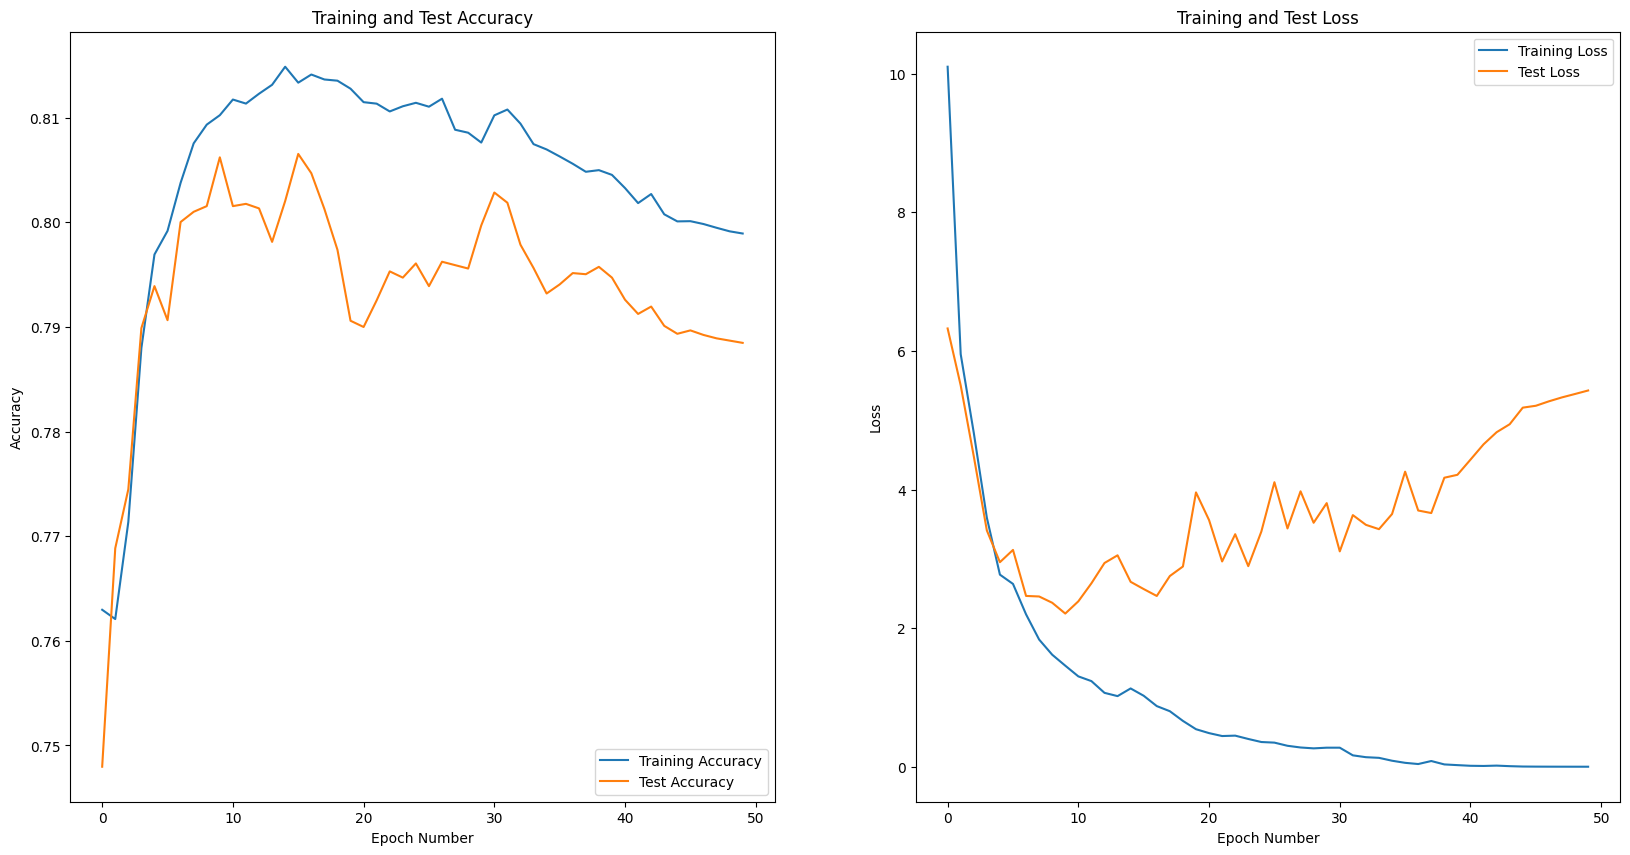

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")

plt.savefig(os.path.join(proj_model_dir, "newest_model_metrics.pdf"))

plt.show()

In [102]:
# proj_model_dir = "../models/9th experiment/2"

# with open(os.path.join(proj_model_dir, "best_run.json"), "r") as f:
#     model_architecture = json.loads(f.read())
    
best_model = keras.models.model_from_json(model_architecture)
best_model.load_weights(os.path.join(proj_model_dir, "best_run.hdf5"))
best_model.compile(optimizer='adam', loss=CTCLoss, metrics=['accuracy'])

In [70]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(decode_word(result.numpy())).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

In [103]:
val_result = best_model.evaluate(val_ds)

loss = val_result[0]
accuracy = val_result[1]
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

28/28 [==============================] - 3s 66ms/step - loss: 1.9542 - accuracy: 0.7412
Validation Loss: 1.9541763067245483
Validation Accuracy: 0.741240918636322


In [104]:
predictions = []
targets = []
for batch in val_ds:
    X, y = batch
    batch_predictions = best_model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(decode_word(label.numpy())).numpy().decode("utf-8")
        targets.append(label)

wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in range(0, len(predictions)):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)

1/1 [==============================] - 1s 675ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.2107
----------------------------------------------------------------------------------------------------
Target    : FAE1MAH0LIY0               
Prediction: FAE1MAH0LIY0               
----------------------------------------------------------------------------------------------------
Target    : FAE1MAH0LIY0               
Prediction: FAE1MAH0LIY0               
----------------------------------------------------------------------------------------------------
Target    : BIH0LIY1V                
Prediction: BIH0LIY1V                
----------------------------------------------------------------------------------------------------
Target    : BIH0LIY1V                
Prediction: BIH0LIY1V                
----------------------------------------------------------------------------------------------------
Targe